In [1]:
import pandas as pd
import joblib
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_test = pd.read_csv("../dataset/test_set.csv")

df_train = pd.read_csv("../dataset/training_set.csv")
df_filtered = df_train[df_train["multiclass_label"] != "not_cyberbullying"].copy()
label2id = {label: idx for idx, label in enumerate(sorted(df_filtered["multiclass_label"].unique()))}

X_test_text_1 = df_test["text"]
y_test_1 = df_test["binary_label"].map({"cyberbullying": 1, "not_cyberbullying": 0}).values
tfidf_vectorizer_1 = joblib.load("../model/tfidf_vocabulary.pkl")
X_test_tfidf_1 = tfidf_vectorizer_1.transform(X_test_text_1)

X_test_text_2 = df_test['text']
y_test_2 = df_test["multiclass_label"].map(label2id)
tfidf_vectorizer_2 = joblib.load("../model/tfidf_vocabulary_multiclass.pkl")
X_test_tfidf_2 = tfidf_vectorizer_2.transform(X_test_text_2)

file_name1 = f"../model/grid_search_binary_f1/RandomForest_TF-IDF.pkl"
clf1 = joblib.load(file_name1)
file_name2 = f"../model/grid_search_multiclass/RandomForest_TF-IDF_multiclass.pkl"
clf2 = joblib.load(file_name2)

=== Classification Report: Binary ===
                   precision    recall  f1-score   support

not_cyberbullying       0.44      0.76      0.56      1561
    cyberbullying       0.94      0.81      0.87      7899

         accuracy                           0.80      9460
        macro avg       0.69      0.78      0.71      9460
     weighted avg       0.86      0.80      0.82      9460

=== Confusion Matrix: Binary ===


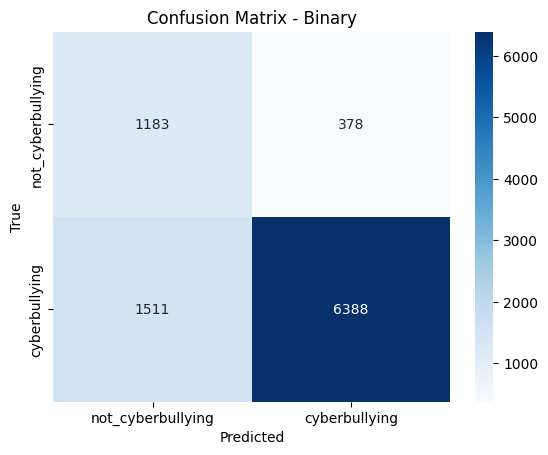

=== Classification Report: Multiclass (only true positives) ===
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1554
         1.0       0.99      0.99      0.99      1573
         2.0       0.94      0.94      0.94      1327
         3.0       0.76      0.78      0.77       435
         4.0       0.99      0.98      0.99      1499

    accuracy                           0.96      6388
   macro avg       0.93      0.94      0.93      6388
weighted avg       0.96      0.96      0.96      6388

=== Confusion Matrix: Multiclass (only true positives) ===


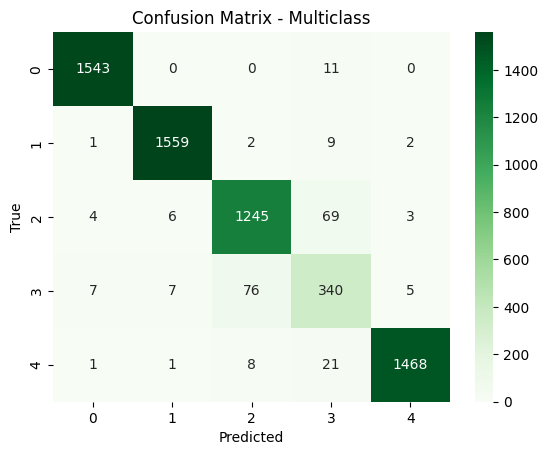

=== Overall Accuracy (binary + multiclass chaining) ===
Correct: 7338 / 9460 = 0.7757


In [3]:
# --- Classificazione binaria ---
y_pred_binary = clf1.predict(X_test_tfidf_1)
print("=== Classification Report: Binary ===")
print(classification_report(y_test_1, y_pred_binary, target_names=["not_cyberbullying", "cyberbullying"]))

print("=== Confusion Matrix: Binary ===")
cm_binary = confusion_matrix(y_test_1, y_pred_binary)
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', xticklabels=["not_cyberbullying", "cyberbullying"], yticklabels=["not_cyberbullying", "cyberbullying"])
plt.title("Confusion Matrix - Binary")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Classificazione multiclasse sui TP ---
true_positive_mask = (y_test_1 == 1) & (y_pred_binary == 1)
X_test_tfidf_2_filtered = X_test_tfidf_2[true_positive_mask]
y_test_2_filtered = y_test_2[true_positive_mask]
y_pred_multiclass = clf2.predict(X_test_tfidf_2_filtered)

print("=== Classification Report: Multiclass (only true positives) ===")
print(classification_report(y_test_2_filtered, y_pred_multiclass))

print("=== Confusion Matrix: Multiclass (only true positives) ===")
cm_multi = confusion_matrix(y_test_2_filtered, y_pred_multiclass)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Multiclass")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Accuracy complessiva ---
true_negative = ((y_test_1 == 0) & (y_pred_binary == 0)).sum()
true_positive_multiclass = (y_pred_multiclass == y_test_2_filtered).sum()
total_test_samples = len(y_test_1)
overall_correct = true_negative + true_positive_multiclass
overall_accuracy = overall_correct / total_test_samples

print(f"=== Overall Accuracy (binary + multiclass chaining) ===\nCorrect: {overall_correct} / {total_test_samples} = {overall_accuracy:.4f}")

In [ ]:
true_positives = df_test[true_positive_mask]

true_positives.to_csv("../dataset/true_positive.csv", index=False)